In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data in sheet

In [ ]:
# loading sample_loan_data

df_loan=pd.read_csv("/content/drive/MyDrive/trnxs_data/sample_loan_data.csv")

In [ ]:
# loading sample_profile_data

df_profile=pd.read_csv("/content/drive/MyDrive/trnxs_data/sample_profile_data_f.csv")

In [ ]:
# loading sample_transaction data

df_trnxs=pd.read_parquet("/content/drive/MyDrive/trnxs_data/sample_users_transactions.parquet", engine = "pyarrow")

In [ ]:
# merging profile and transaction data

df_prof_trnxs_in = pd.merge(df_trnxs,df_profile, how="inner", left_on="trans_user_id", right_on = "profile_user_id")

In [ ]:
# merging profile transaction(df_prof_trnxs_in) and loan data

df_prof_trnxs_loan = pd.merge(df_prof_trnxs_in,df_loan, how="inner", left_on="trans_user_id", right_on = "loan_user_id")

## Initial data description

In [ ]:
df_prof_trnxs_loan

,trans_id,trans_user_id,trans_name,trans_amount,trans_after_balance,trans_date,trans_personal_category,trans_personal_cat_details,trans_created_at,profile_user_id,...,profile_city,profile_residence_state,profile_registerd_device,loan_id,loan_user_id,loan_amount,loan_repay_date,loan_repay_extended_date,loan_status,loan_created_at
0,50187184,764849,ZEL*CAFE GONZALES CAFE Atlanta G,-12.00,-2168.90,2022-01-19,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-05-30 04:56:54,764849,...,Houston,Texas,ios,517710,764849,100.0,2022-05-31,NaN,2,2022-05-22 04:12:53
1,50187185,764849,"Garuda Labs, Inc. San FranciscoC",-165.00,-2003.90,2022-01-19,TRANSFER_IN,TRANSFER_IN_ACCOUNT_TRANSFER,2022-05-30 04:56:54,764849,...,Houston,Texas,ios,517710,764849,100.0,2022-05-31,NaN,2,2022-05-22 04:12:53
2,50187186,764849,ATM BALANCE INQUIRY FEE,1.50,-2005.40,2022-01-19,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54,764849,...,Houston,Texas,ios,517710,764849,100.0,2022-05-31,NaN,2,2022-05-22 04:12:53
3,50187187,764849,WITHDRAWAL FEE,2.50,-2007.90,2022-01-20,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54,764849,...,Houston,Texas,ios,517710,764849,100.0,2022-05-31,NaN,2,2022-05-22 04:12:53
4,50187188,764849,Shell,29.02,-2036.92,2022-01-20,TRANSPORTATION,TRANSPORTATION_GAS,2022-05-30 04:56:54,764849,...,Houston,Texas,ios,517710,764849,100.0,2022-05-31,NaN,2,2022-05-22 04:12:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199828,62860076,750224,"+16506819470, CA, USA",20.75,2695.29,2022-06-07,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01,750224,...,Catonsville,Maryland,ios,506686,750224,140.0,2022-06-04,NaN,2,2022-05-13 16:20:29
2199829,62860077,750224,"San Francisco, CA, USA",50.00,2645.29,2022-06-08,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01,750224,...,Catonsville,Maryland,ios,506686,750224,140.0,2022-06-04,NaN,2,2022-05-13 16:20:29
2199830,62860078,750224,"ESSEX, MD, USA",14.71,2630.58,2022-06-08,LOAN_PAYMENTS,LOAN_PAYMENTS_PERSONAL_LOAN_PAYMENT,2022-06-09 00:07:01,750224,...,Catonsville,Maryland,ios,506686,750224,140.0,2022-06-04,NaN,2,2022-05-13 16:20:29
2199831,62860079,750224,"CATONSVILLE CRO Cantonsville, MD, USA",64.88,2565.70,2022-06-08,TRANSFER_OUT,TRANSFER_OUT_INVESTMENT_AND_RETIREMENT_FUNDS,2022-06-09 00:07:01,750224,...,Catonsville,Maryland,ios,506686,750224,140.0,2022-06-04,NaN,2,2022-05-13 16:20:29


#### volume of data

In [ ]:
# total volume of data

print(df_prof_trnxs_loan.shape)

(2199833, 21)


#### Null values in data provided

In [ ]:
# sum of all null values in profile data

df_profile.isnull().sum()

# The column named profile_birth_date and profile_city has more than 50% of the null values 
# so we can exclude these columns for further EDA

profile_user_id                0
profile_birth_date          2261
profile_city                2435
profile_residence_state       25
profile_registerd_device       0
dtype: int64

In [ ]:
# sum of all null values in loan data

df_loan.isnull().sum()

loan_id                        0
loan_user_id                   0
loan_amount                    0
loan_repay_date                0
loan_repay_extended_date    3756
loan_status                    0
loan_created_at                0
dtype: int64

In [ ]:
# sum of all null values in transaction data

df_trnxs.isnull().sum()

# not significant null values in column named trans_personal_cat_details

trans_id                      0
trans_user_id                 0
trans_name                    0
trans_amount                  0
trans_after_balance           0
trans_date                    0
trans_personal_category       7
trans_personal_cat_details    7
trans_created_at              0
dtype: int64

In [ ]:
# return description of the data in the DataFrame

df_loan.describe()

,loan_id,loan_user_id,loan_amount,loan_status
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,501355.814872,675702.548462,44.203846,2.911538
std,10895.502818,145879.211931,34.678211,1.930737
min,489447.000000,25505.000000,15.000000,2.000000
25%,492688.250000,701491.500000,20.000000,2.000000
50%,497179.500000,730036.000000,35.000000,2.000000
75%,508050.000000,742500.000000,55.000000,2.000000
max,533951.000000,786189.000000,200.000000,7.000000


## plots

In [ ]:
# change loan status from str dtype to object.

df_prof_trnxs_loan["loan_status"] = df_prof_trnxs_loan["loan_status"].astype(str)

In [ ]:
# return datatypes for particular column

df_prof_trnxs_loan.dtypes

trans_id                               int64
trans_user_id                          int64
trans_name                            object
trans_amount                         float64
trans_after_balance                  float64
trans_date                            object
trans_personal_category               object
trans_personal_cat_details            object
trans_created_at              datetime64[ns]
profile_user_id                        int64
profile_birth_date                    object
profile_city                          object
profile_residence_state               object
profile_registerd_device              object
loan_id                                int64
loan_user_id                           int64
loan_amount                          float64
loan_repay_date                       object
loan_repay_extended_date              object
loan_status                           object
loan_created_at                       object
dtype: object

##loan data plotting


In [ ]:
df_loan

,loan_id,loan_user_id,loan_amount,loan_repay_date,loan_repay_extended_date,loan_status,loan_created_at
0,489447,724848,20.0,2022-05-30,NaN,2,2022-05-01 00:03:50
1,489448,601624,15.0,2022-05-30,NaN,7,2022-05-01 00:04:05
2,489450,724851,75.0,2022-05-30,NaN,2,2022-05-01 00:06:24
3,489455,588557,15.0,2022-05-30,NaN,7,2022-05-01 00:12:08
4,489456,724887,20.0,2022-05-30,NaN,7,2022-05-01 00:19:59
...,...,...,...,...,...,...,...
3895,532340,784712,140.0,2022-06-07,NaN,2,2022-06-02 13:53:38
3896,532535,784988,15.0,2022-07-01,NaN,2,2022-06-02 16:14:08
3897,533353,786116,20.0,2022-07-02,NaN,2,2022-06-03 05:00:49
3898,533443,786189,30.0,2022-07-03,NaN,2,2022-06-03 06:37:23


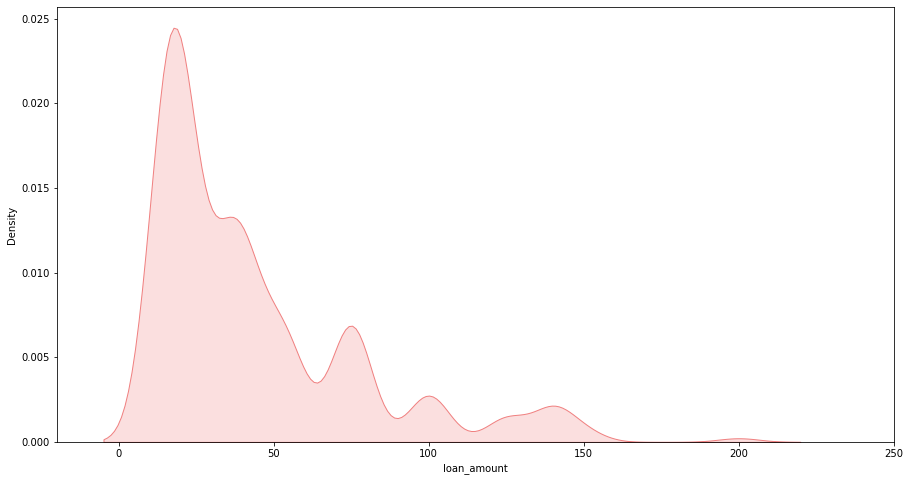

In [ ]:
# Density plot for distribution of loan amount 

plt.figure(figsize=(15,8))
sns.kdeplot(df_loan['loan_amount'],color="lightcoral", shade=True)
plt.xlim(-20,250)
plt.show()

**Loan amount distribution**. Out of total 3900 users, **2606** users had took loan amount between **15-40** . **443** users took loan of amount **75**

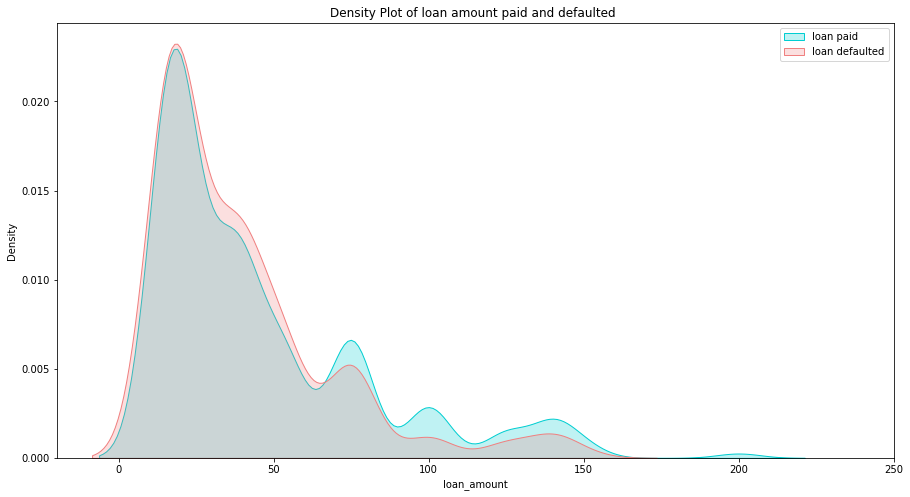

In [ ]:
# Density plot for distribution of loan amount for loan status 2 (loan paid) and 7 (loan defaulted)

plt.figure(figsize=(15,8))
sns.kdeplot(df_loan['loan_amount'][df_loan.loan_status==2],color="darkturquoise", shade=True)
sns.kdeplot(df_loan['loan_amount'][df_loan.loan_status==7],color="lightcoral", shade=True)
plt.legend(['loan paid', 'loan defaulted'])
plt.title('Density Plot of loan amount paid and defaulted ')
plt.xlim(-20,250)
plt.show()

Majority of defaulted loan is in between 15 and 70 loan amount. Majority of Loan payers is between 70 and 200 loan amount.



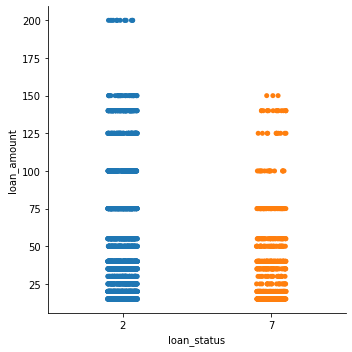

In [ ]:
# Categorical Plot for loan status for particular loan amount

sns.catplot(data=df_loan, x="loan_status", y="loan_amount")

Majority of loan defaulted is between loan amount 15-150.

In the month of **March 2022**, **41** users have extended their loan payment date in which **28** users have paid the amount and **13** users are defaulters.
In the month of **June 2022**, **102** users have extended their loan payment date in which **82** users have paid the amount and **20** users are defaulters.



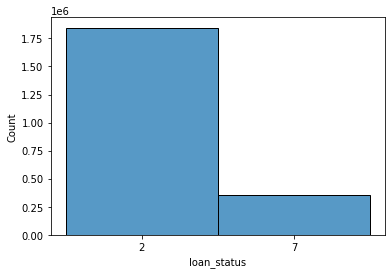

In [ ]:
# Histogram plot for count of users for loan status 2 and 7

sns.histplot(df_prof_trnxs_loan["loan_status"], log_scale = False)

Majority of users paid the loan amount. Out of total 3900 users **711** users are **defaulters** and **3189** users had **paid** the loan amount.

In [ ]:
df_loan.head(3)

,loan_id,loan_user_id,loan_amount,loan_repay_date,loan_repay_extended_date,loan_status,loan_created_at
0,489447,724848,20.0,2022-05-30,NaN,2,2022-05-01 00:03:50
1,489448,601624,15.0,2022-05-30,NaN,7,2022-05-01 00:04:05
2,489450,724851,75.0,2022-05-30,NaN,2,2022-05-01 00:06:24


In [ ]:
# grouped count of user id by loan amount

df_loan_count_amnt = df_loan[['loan_amount', "loan_user_id"]].groupby(by = "loan_amount").count().reset_index().sort_values(by = "loan_user_id", ascending = False)

In [ ]:
df_loan_count_amnt

,loan_amount,loan_user_id
0,15.0,856
1,20.0,741
5,40.0,473
8,75.0,443
4,35.0,287
7,55.0,239
6,50.0,177
9,100.0,177
3,30.0,127
2,25.0,122


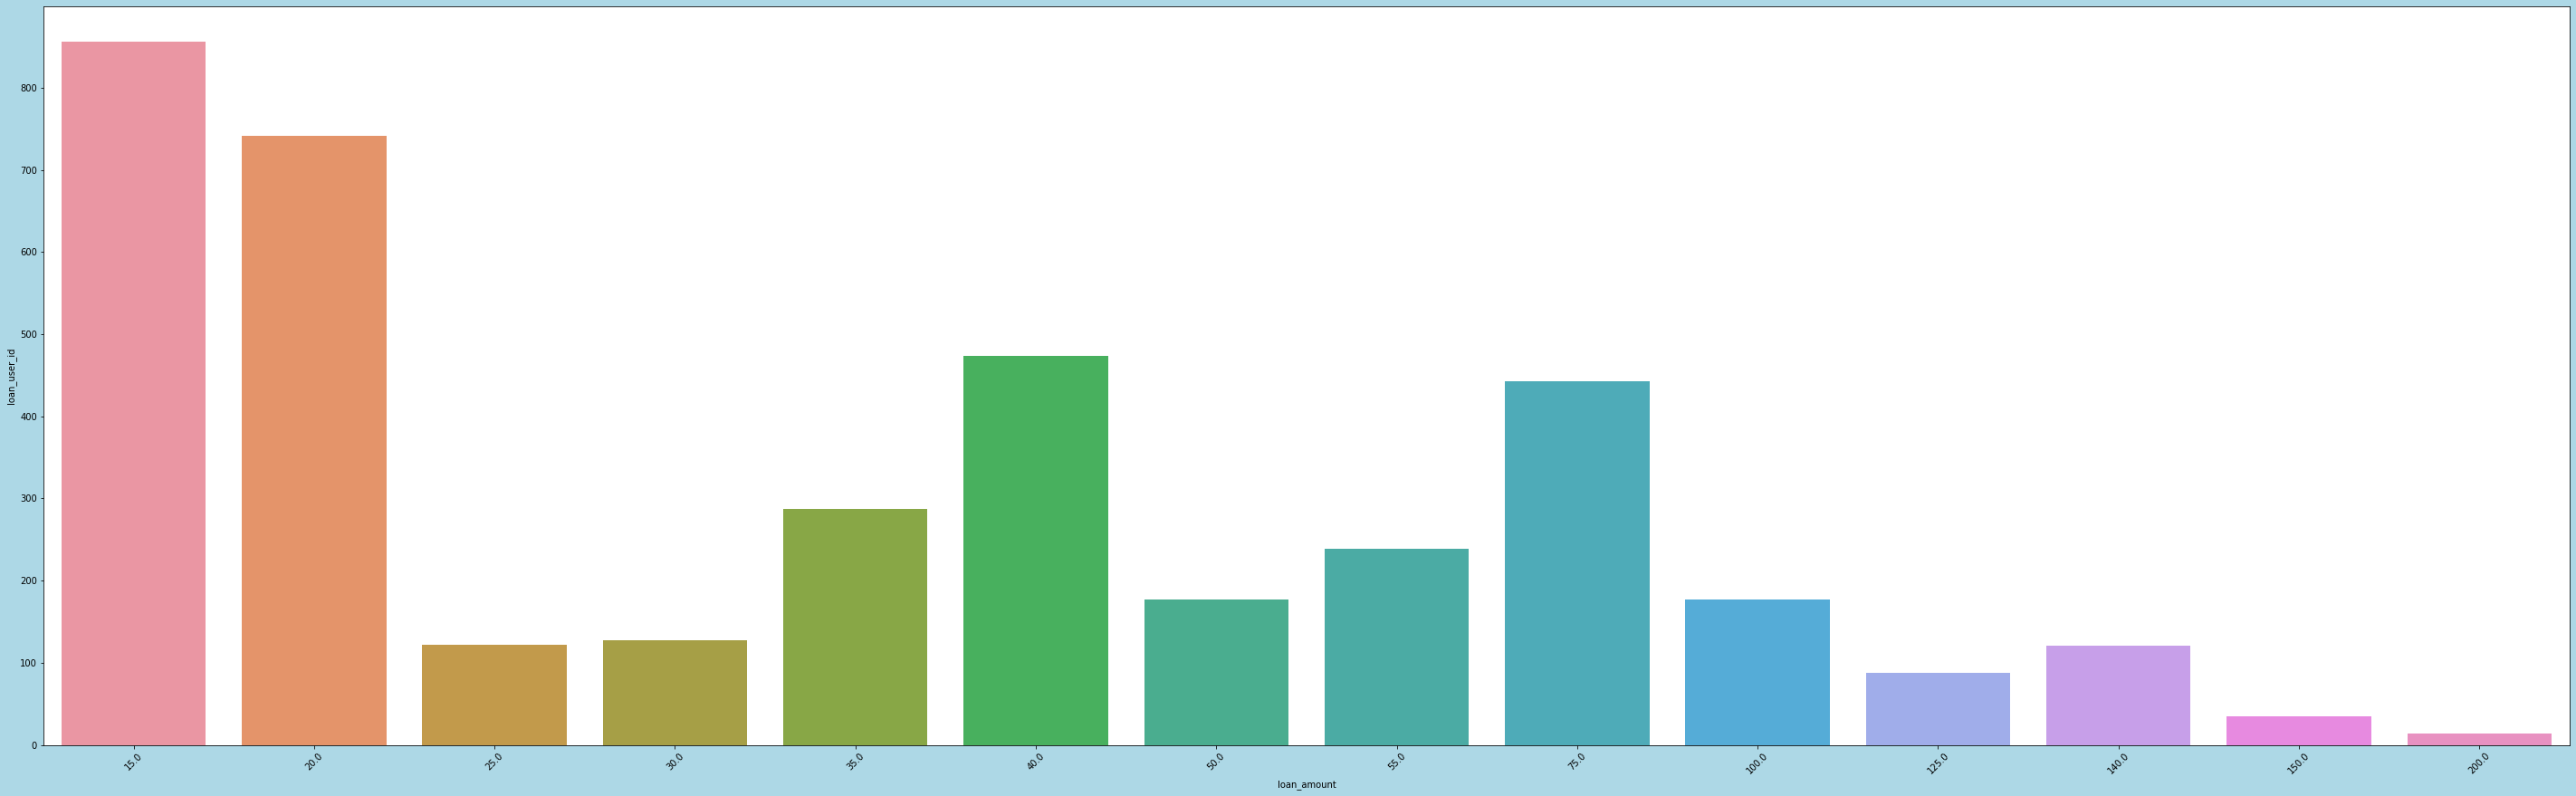

In [ ]:
# Plot for loan amount

plt.figure(figsize=(50,15),facecolor='lightblue',edgecolor='black')
sns.barplot(x = df_loan_count_amnt["loan_amount"], y = df_loan_count_amnt["loan_user_id"])
plt.xticks(rotation=45)
plt.show()

Maximum loan amount taken: 200 .
Minimum loan amount taken: 15 .
Average user took loan of amount 75 .
856 users took loan of amount 15
Only 14 users took loan of amount 200 .
443 users took loan of 75

In [ ]:
# mean loan amount

df_loan_count_amnt["loan_amount"].mean()

75.71428571428571

In [ ]:
# maximum loan amount

df_loan_count_amnt["loan_amount"].max()

200.0

In [ ]:
# minimum loan amount

df_loan_count_amnt["loan_amount"].min()

15.0

##profile data


In [ ]:
df_profile

,profile_user_id,profile_birth_date,profile_city,profile_residence_state,profile_registerd_device
0,50620,1982-03-21,Villa Rica,Georgia,ios
1,51262,1966-06-02,Okemos,Michigan,ios
2,63276,1993-10-07,beaver,Utah,ios
3,63281,1991-08-15,Sumter,South Carolina,ios
4,65404,NaN,NaN,Texas,ios
...,...,...,...,...,...
3880,784112,NaN,NaN,Illinois,ios
3881,784712,2022-06-03,NaN,New York,ios
3882,784988,1997-05-02,Salina,Kansas,android
3883,786116,2022-06-02,NaN,Washington,ios


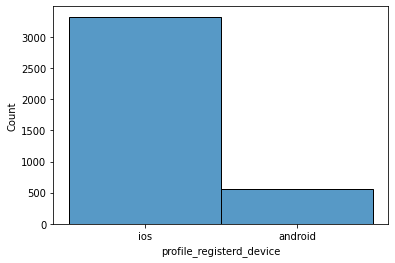

In [ ]:
# user registered device plot

sns.histplot(df_profile["profile_registerd_device"], log_scale = False)

>> Out of 3885 records from user profile dataset: **563** are **andoid users** and **3322** are **ios users**.

In [ ]:
# profile data columns

df_profile.columns

Index(['profile_user_id', 'profile_birth_date', 'profile_city',
       'profile_residence_state', 'profile_registerd_device'],
      dtype='object')

In [ ]:
# used goupby function to group userid count for every residence state

df_prof_count_state=df_profile[['profile_residence_state', "profile_user_id"]].groupby(by = "profile_residence_state").count().reset_index().sort_values(by = "profile_user_id", ascending = False)

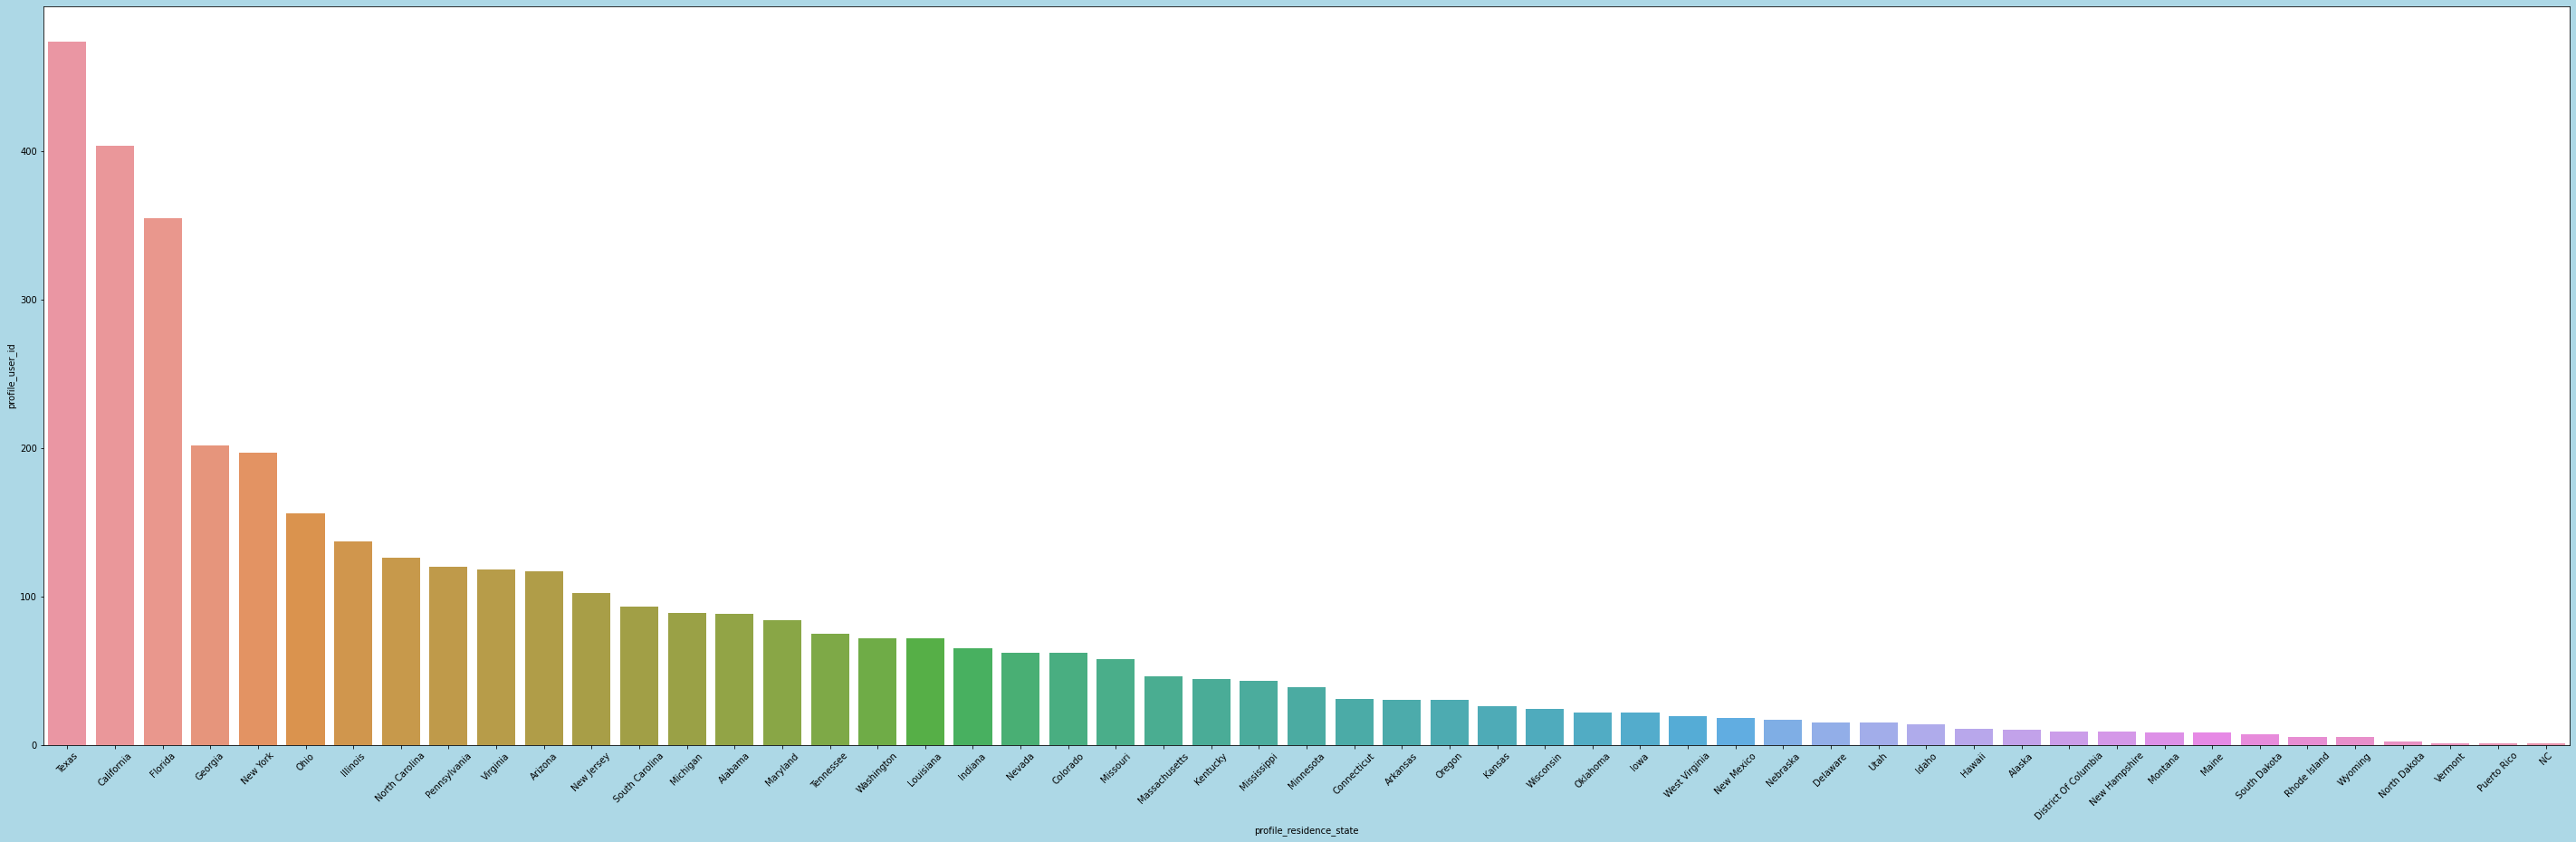

In [ ]:
# Bar plot for state wise user id

plt.figure(figsize=(50,15),facecolor='lightblue',edgecolor='black')
sns.barplot(x = df_prof_count_state["profile_residence_state"], y = df_prof_count_state["profile_user_id"])
plt.xticks(rotation=45)
plt.show()

States that have **maximum users** are **Texas**, **California** and **Florida**.
State that have **only one user** are **Vermont**, **Peurto Rico** and **NC**. States that have less than 10 users are 12 states out of 53 states

In [ ]:
df_profile["profile_residence_state"]

0              Georgia
1             Michigan
2                 Utah
3       South Carolina
4                Texas
             ...      
3880          Illinois
3881          New York
3882            Kansas
3883        Washington
3884          Michigan
Name: profile_residence_state, Length: 3885, dtype: object

In [ ]:
df_profile_head=df_profile.head(500)

In [ ]:
df_profile_head

,profile_user_id,profile_birth_date,profile_city,profile_residence_state,profile_registerd_device
0,50620,1982-03-21,Villa Rica,Georgia,ios
1,51262,1966-06-02,Okemos,Michigan,ios
2,63276,1993-10-07,beaver,Utah,ios
3,63281,1991-08-15,Sumter,South Carolina,ios
4,65404,NaN,NaN,Texas,ios
...,...,...,...,...,...
495,558428,1986-04-28,Murfreesboro,Tennessee,android
496,558840,NaN,NaN,Arkansas,ios
497,558944,NaN,NaN,Minnesota,ios
498,559715,2003-11-25,Grand Rapids,Michigan,ios


In [ ]:
df_profile['profile_registerd_device'][df_profile.profile_registerd_device=='android']

5       android
36      android
50      android
52      android
73      android
         ...   
3843    android
3852    android
3869    android
3873    android
3882    android
Name: profile_registerd_device, Length: 563, dtype: object

##transaction data

In [ ]:
df_trnxs 

,trans_id,trans_user_id,trans_name,trans_amount,trans_after_balance,trans_date,trans_personal_category,trans_personal_cat_details,trans_created_at
0,50187184,764849,ZEL*CAFE GONZALES CAFE Atlanta G,-12.00,-2168.90,2022-01-19,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-05-30 04:56:54
1,50187185,764849,"Garuda Labs, Inc. San FranciscoC",-165.00,-2003.90,2022-01-19,TRANSFER_IN,TRANSFER_IN_ACCOUNT_TRANSFER,2022-05-30 04:56:54
2,50187186,764849,ATM BALANCE INQUIRY FEE,1.50,-2005.40,2022-01-19,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54
3,50187187,764849,WITHDRAWAL FEE,2.50,-2007.90,2022-01-20,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54
4,50187188,764849,Shell,29.02,-2036.92,2022-01-20,TRANSPORTATION,TRANSPORTATION_GAS,2022-05-30 04:56:54
...,...,...,...,...,...,...,...,...,...
2208141,62860076,750224,"+16506819470, CA, USA",20.75,2695.29,2022-06-07,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01
2208142,62860077,750224,"San Francisco, CA, USA",50.00,2645.29,2022-06-08,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01
2208143,62860078,750224,"ESSEX, MD, USA",14.71,2630.58,2022-06-08,LOAN_PAYMENTS,LOAN_PAYMENTS_PERSONAL_LOAN_PAYMENT,2022-06-09 00:07:01
2208144,62860079,750224,"CATONSVILLE CRO Cantonsville, MD, USA",64.88,2565.70,2022-06-08,TRANSFER_OUT,TRANSFER_OUT_INVESTMENT_AND_RETIREMENT_FUNDS,2022-06-09 00:07:01


In [ ]:
df_trnxs_ = df_trnxs[['trans_date', "trans_user_id"]].groupby(by = "trans_user_id").count().reset_index()

In [ ]:
df_trnxs_

,trans_user_id,trans_date
0,25505,637
1,29363,372
2,30729,659
3,34772,515
4,34807,307
...,...,...
3895,784112,363
3896,784712,155
3897,784988,672
3898,786116,856


In [ ]:
df_trnxs_count_prsnl_ctgry = df_trnxs[['trans_personal_category', "trans_user_id"]].groupby(by = "trans_personal_category").count().reset_index().sort_values(by = "trans_user_id", ascending = False)

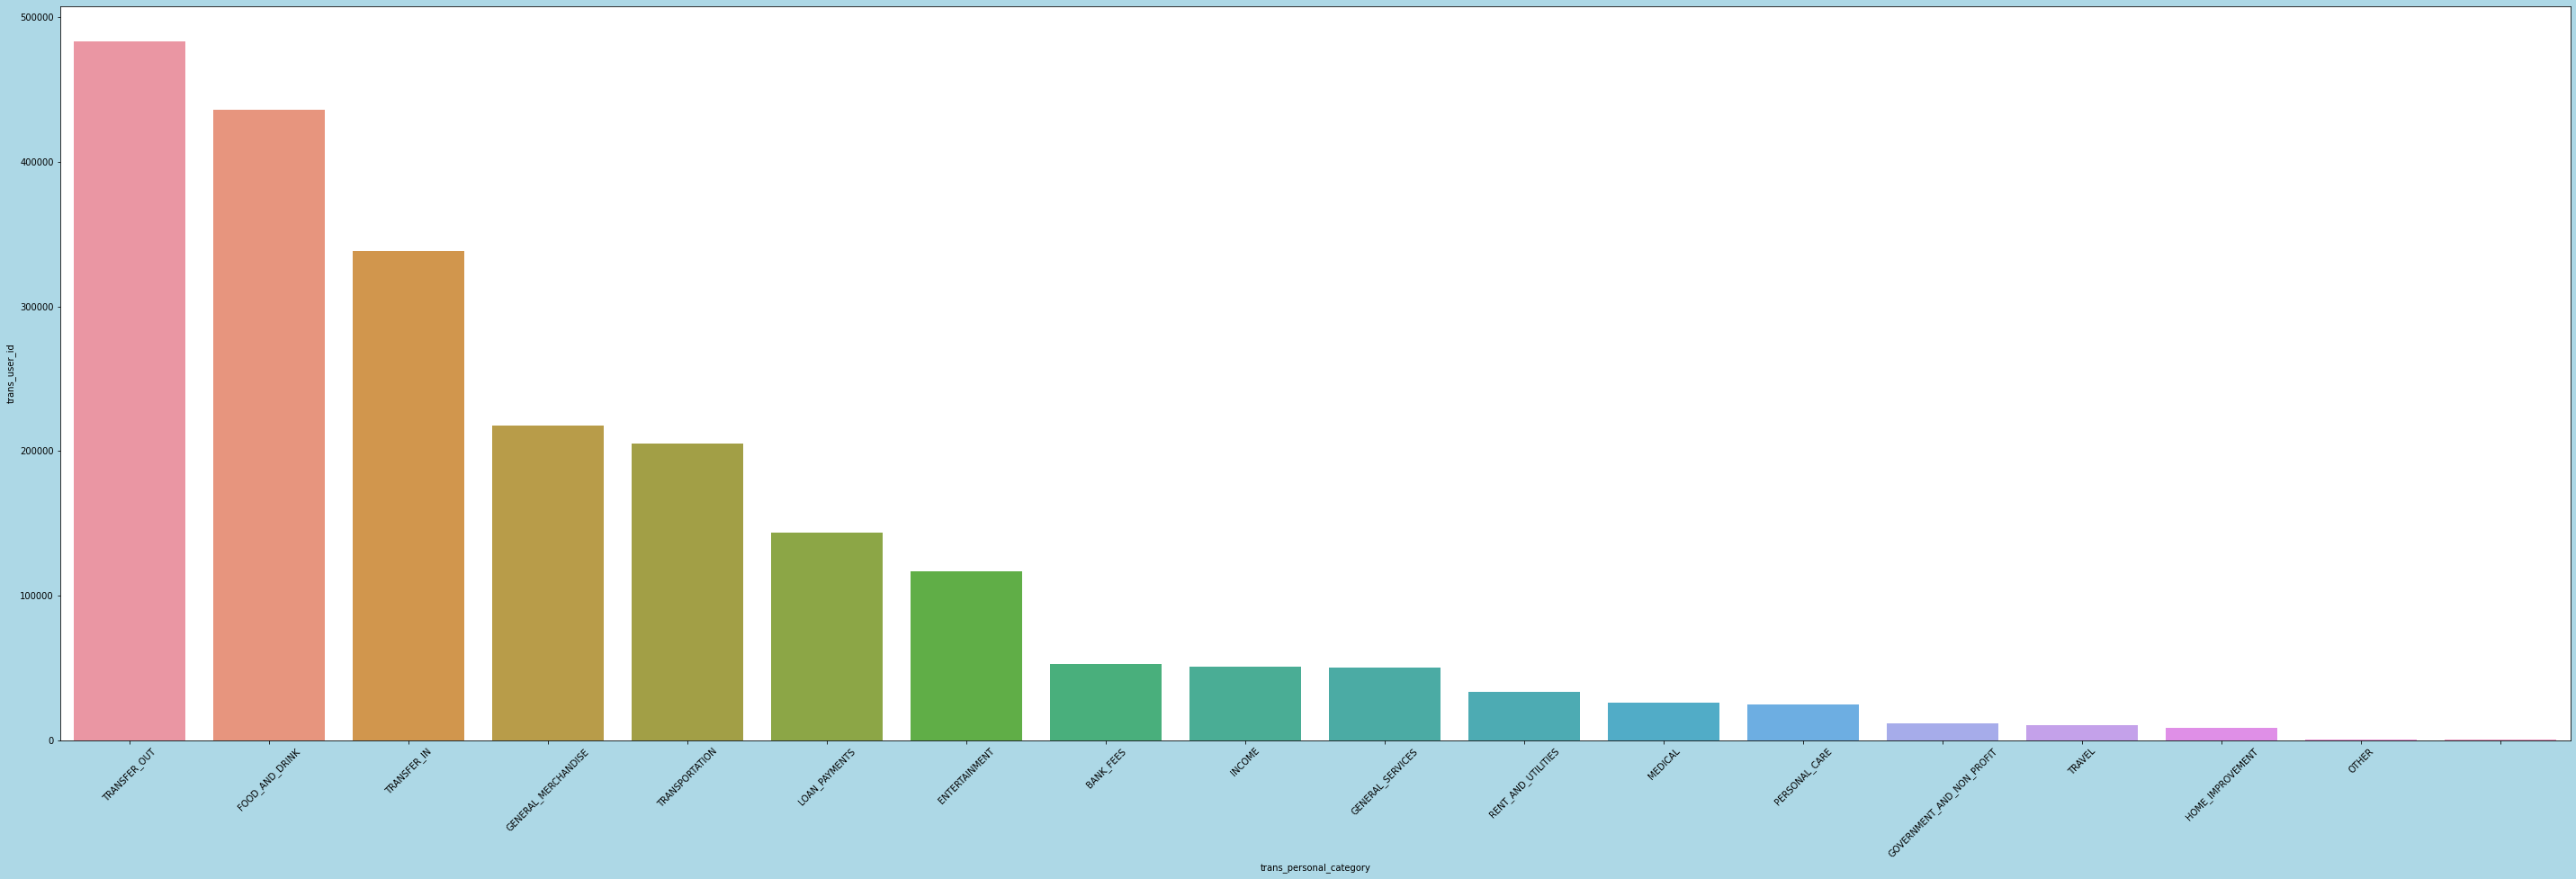

In [ ]:
plt.figure(figsize=(50,15),facecolor='lightblue',edgecolor='black')
sns.barplot(x = df_trnxs_count_prsnl_ctgry["trans_personal_category"], y = df_trnxs_count_prsnl_ctgry["trans_user_id"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# df_trnxs_count_prsnl_ctgry = df_trnxs[['trans_personal_category', "trans_user_id"]].groupby(by = "trans_personal_category").count().reset_index().sort_values(by = "trans_user_id", ascending = False)

In [ ]:
df_trnxs_count_cat_deta = df_trnxs[['trans_personal_cat_details', "trans_user_id"]].groupby(by = "trans_personal_cat_details").count().reset_index().sort_values(by = "trans_user_id", ascending = False)

In [ ]:
df_trnxs_count_cat_deta 

,trans_personal_cat_details,trans_user_id
82,TRANSFER_OUT_ACCOUNT_TRANSFER,374506
78,TRANSFER_IN_ACCOUNT_TRANSFER,202058
18,FOOD_AND_DRINK_RESTAURANT,181583
88,TRANSPORTATION_GAS,151340
59,LOAN_PAYMENTS_PERSONAL_LOAN_PAYMENT,142019
...,...,...
0,,63
87,TRANSPORTATION_BIKES_AND_SCOOTERS,48
4,BANK_FEES_INTEREST_CHARGE,13
89,TRANSPORTATION_OTHER_TRANSPORTATION,2


In [ ]:
df_trnxs_count_cat_deta_h = df_trnxs_count_cat_deta.head(20)

In [ ]:
df_trnxs_count_cat_deta_h

,trans_personal_cat_details,trans_user_id
82,TRANSFER_OUT_ACCOUNT_TRANSFER,374506
78,TRANSFER_IN_ACCOUNT_TRANSFER,202058
18,FOOD_AND_DRINK_RESTAURANT,181583
88,TRANSPORTATION_GAS,151340
59,LOAN_PAYMENTS_PERSONAL_LOAN_PAYMENT,142019
15,FOOD_AND_DRINK_FAST_FOOD,96312
79,TRANSFER_IN_CASH_ADVANCES_AND_LOANS,78226
16,FOOD_AND_DRINK_GROCERIES,75144
86,TRANSFER_OUT_WITHDRAWAL,71970
12,ENTERTAINMENT_VIDEO_GAMES,50619


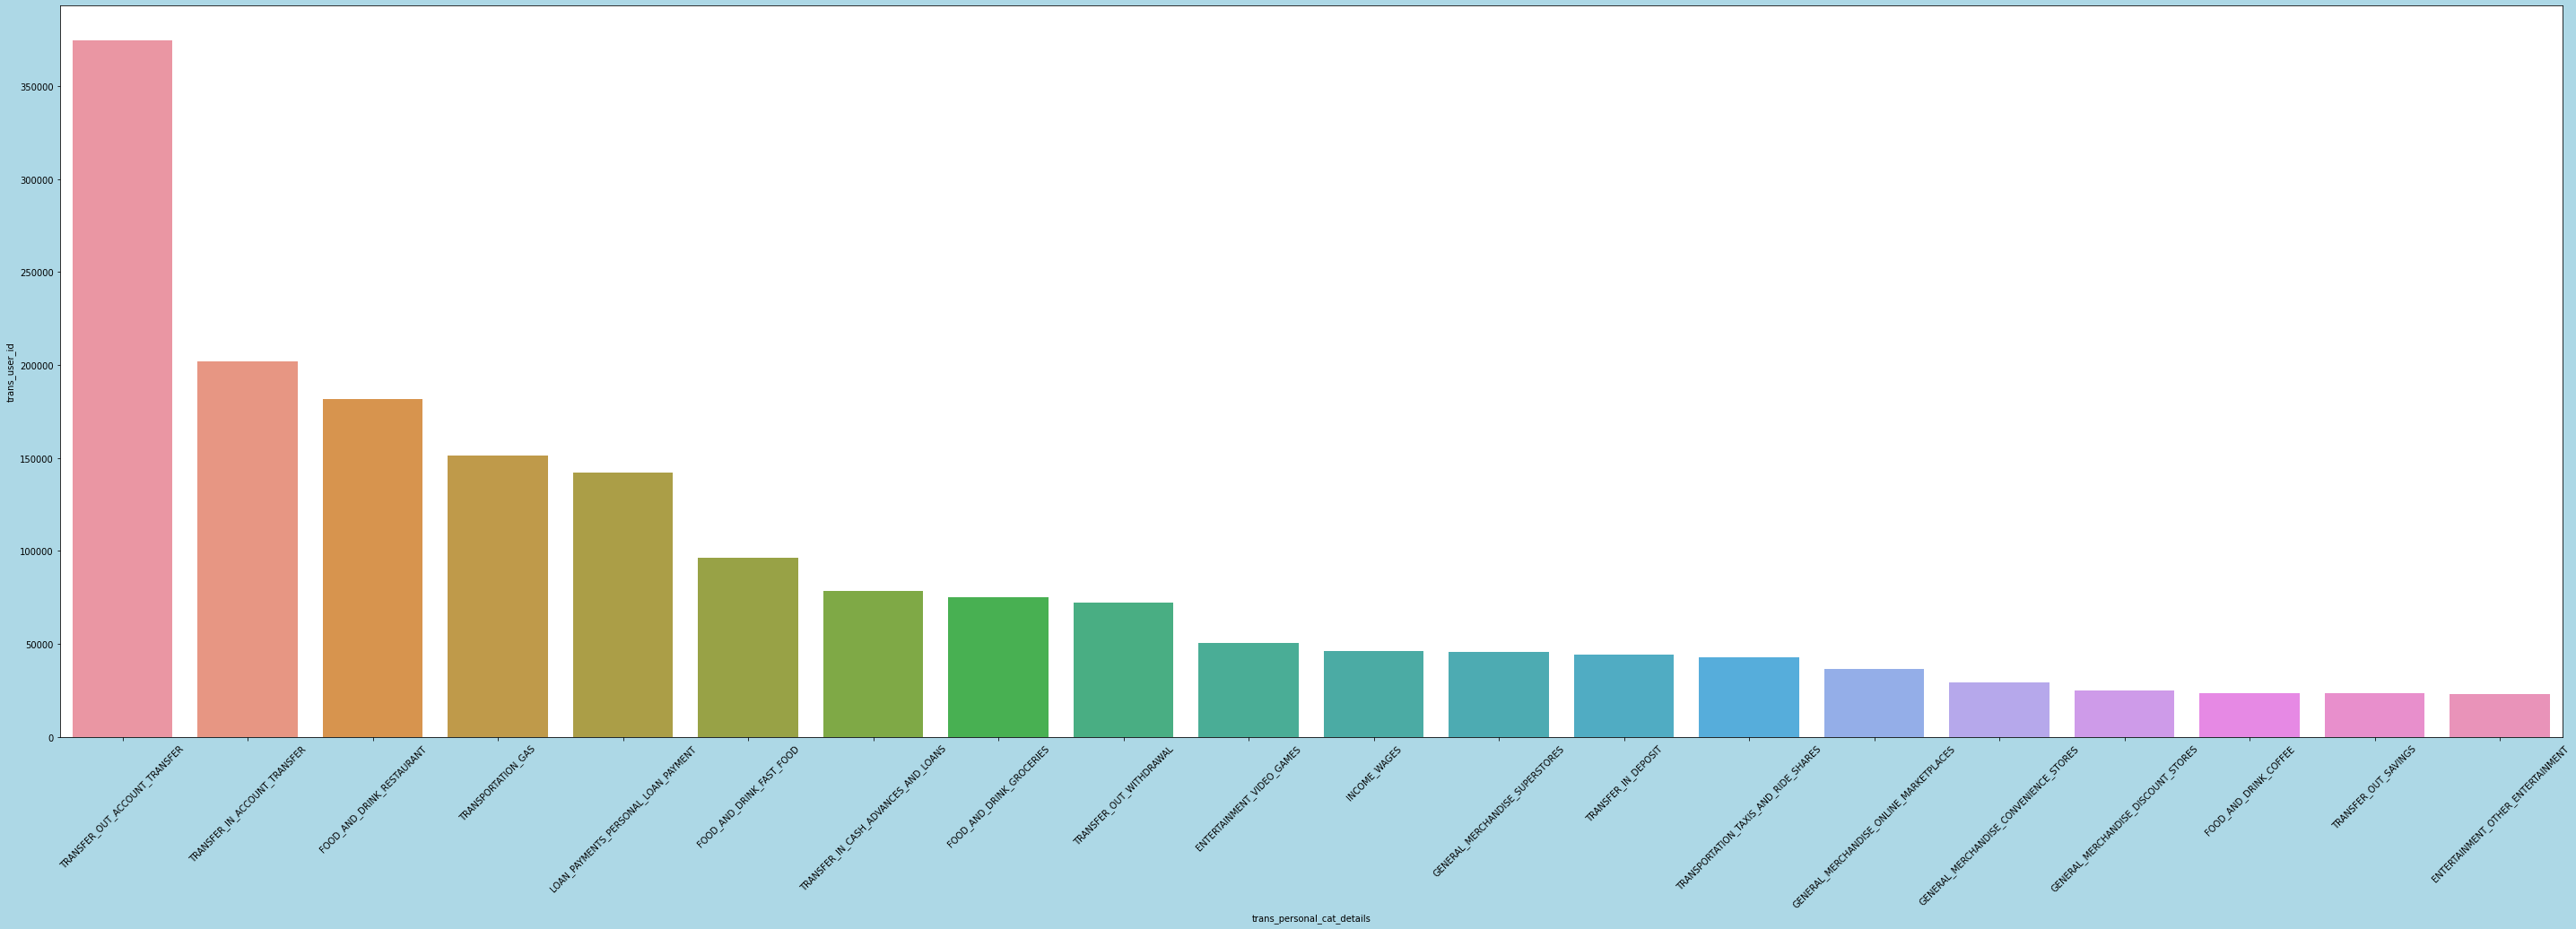

In [ ]:
plt.figure(figsize=(50,15),facecolor='lightblue',edgecolor='black')
sns.barplot(x = df_trnxs_count_cat_deta_h["trans_personal_cat_details"], y = df_trnxs_count_cat_deta_h["trans_user_id"])
plt.xticks(rotation=45)
plt.show()

Top five transaction is of withdrawal, credits, food and drinks, gas and personal loan payment.

In [ ]:
# return absolute values for trans_amount column

df_trnxs['trans_amount_pos'] = df_trnxs['trans_amount'].abs()

In [ ]:
df_trnxs

,trans_id,trans_user_id,trans_name,trans_amount,trans_after_balance,trans_date,trans_personal_category,trans_personal_cat_details,trans_created_at,trans_amount_pos
0,50187184,764849,ZEL*CAFE GONZALES CAFE Atlanta G,-12.00,-2168.90,2022-01-19,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-05-30 04:56:54,12.00
1,50187185,764849,"Garuda Labs, Inc. San FranciscoC",-165.00,-2003.90,2022-01-19,TRANSFER_IN,TRANSFER_IN_ACCOUNT_TRANSFER,2022-05-30 04:56:54,165.00
2,50187186,764849,ATM BALANCE INQUIRY FEE,1.50,-2005.40,2022-01-19,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54,1.50
3,50187187,764849,WITHDRAWAL FEE,2.50,-2007.90,2022-01-20,BANK_FEES,BANK_FEES_ATM_FEES,2022-05-30 04:56:54,2.50
4,50187188,764849,Shell,29.02,-2036.92,2022-01-20,TRANSPORTATION,TRANSPORTATION_GAS,2022-05-30 04:56:54,29.02
...,...,...,...,...,...,...,...,...,...,...
2208141,62860076,750224,"+16506819470, CA, USA",20.75,2695.29,2022-06-07,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01,20.75
2208142,62860077,750224,"San Francisco, CA, USA",50.00,2645.29,2022-06-08,FOOD_AND_DRINK,FOOD_AND_DRINK_RESTAURANT,2022-06-09 00:07:01,50.00
2208143,62860078,750224,"ESSEX, MD, USA",14.71,2630.58,2022-06-08,LOAN_PAYMENTS,LOAN_PAYMENTS_PERSONAL_LOAN_PAYMENT,2022-06-09 00:07:01,14.71
2208144,62860079,750224,"CATONSVILLE CRO Cantonsville, MD, USA",64.88,2565.70,2022-06-08,TRANSFER_OUT,TRANSFER_OUT_INVESTMENT_AND_RETIREMENT_FUNDS,2022-06-09 00:07:01,64.88


In [ ]:
# grouped total transaction amount by date

df_trnxs_daily_amt = df_trnxs[['trans_amount_pos', "trans_date"]].groupby(by = "trans_date").sum().reset_index().sort_values(by = "trans_date", ascending = False)

In [ ]:
# top 20 trans_date on which major transaction took place

df_trnxs_daily_amt.sort_values(by = "trans_amount_pos").tail(20) 

,trans_date,trans_amount_pos
122,2022-03-25,3022293.55
108,2022-03-11,3072979.98
91,2022-02-22,3079745.98
150,2022-04-22,3090417.89
174,2022-05-16,3128457.80
185,2022-05-27,3143071.41
178,2022-05-20,3167804.28
136,2022-04-08,3170546.33
146,2022-04-18,3183048.70
93,2022-02-24,3271479.53


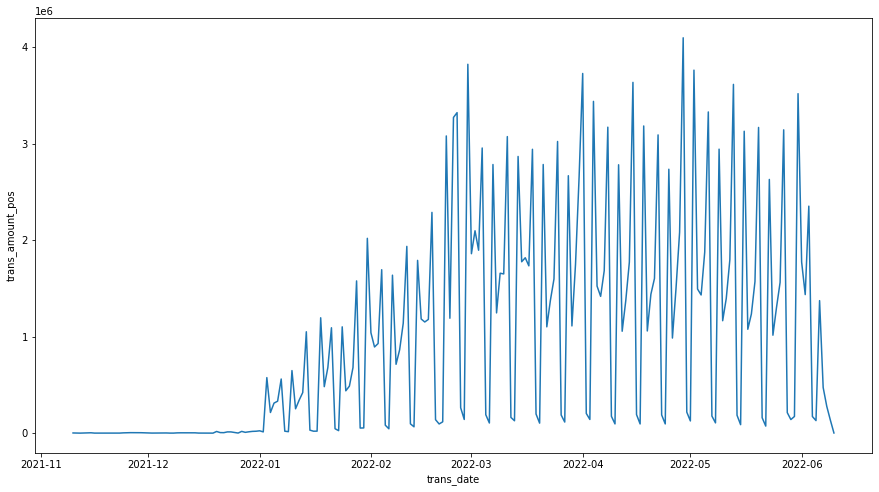

In [ ]:
# plot for dates on which major transaction took place

plt.figure(figsize=(15,8))
sns.lineplot(data=df_trnxs_daily_amt, x="trans_date", y="trans_amount_pos") 

**Majority** of transaction  of amount **4096953.28** took place on date **2022-04-29** . **Minority** of transaction took place on date **2021-12-18** of amount **3.99** .


In [ ]:
df_trnxs['trans_date'].nunique()

200

In [ ]:
# count of transaction for every user id in descending order

df_trnxs_count_trns_amnt = df_trnxs[['trans_amount_pos', "trans_user_id"]].groupby(by = "trans_user_id").sum().reset_index().sort_values(by = "trans_amount_pos", ascending = False)

In [ ]:
# top 20 user id with most transaction

df_trnxs_count_trns_amnt_h = df_trnxs_count_trns_amnt.head(20) 

In [ ]:
# top 20 user id with most transaction

df_trnxs_count_trns_amnt_h 

,trans_user_id,trans_amount_pos
3896,784712,1040581.80
3856,778267,992723.17
3467,759610,576094.53
1509,726411,549504.46
3434,758633,533670.89
2654,737185,517683.82
556,583485,515327.96
2752,739371,384319.00
1369,725521,364429.50
2592,736122,314989.88


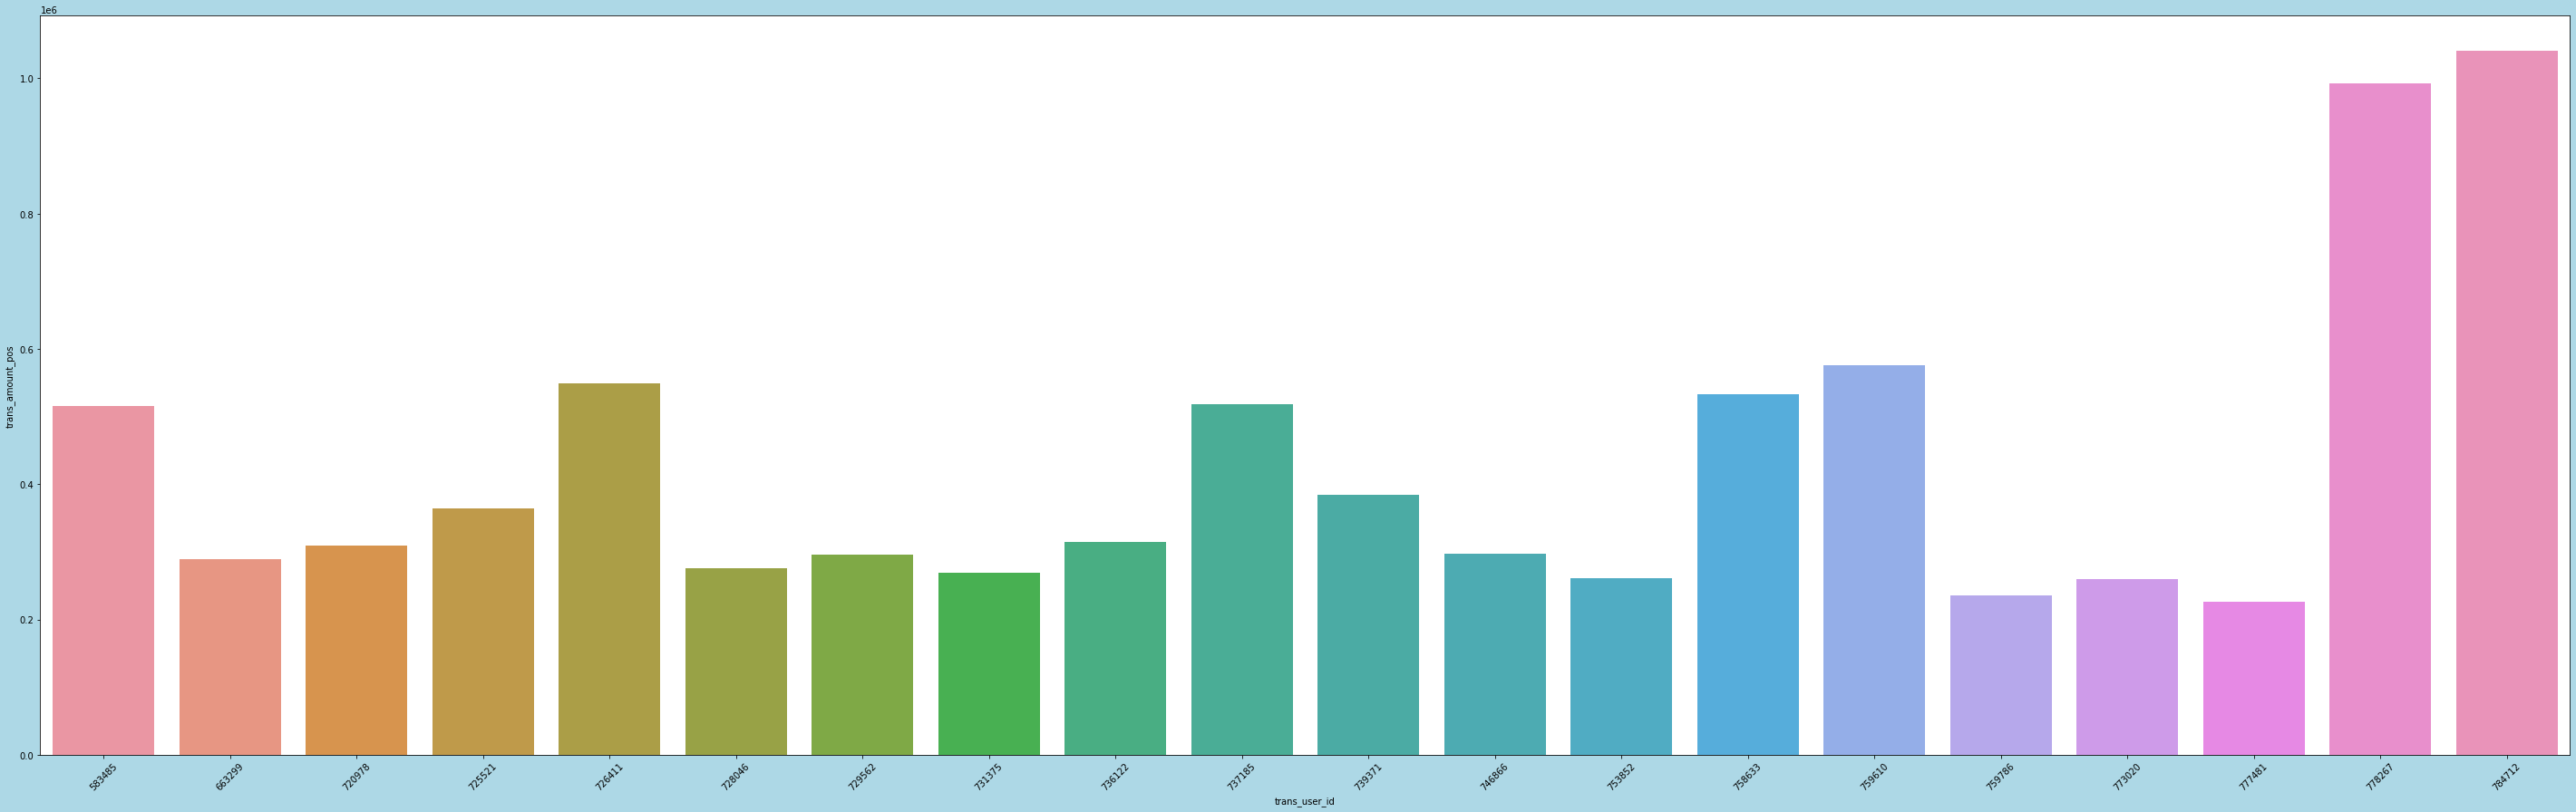

In [ ]:
plt.figure(figsize=(50,15),facecolor='lightblue',edgecolor='black')
sns.barplot(x = df_trnxs_count_trns_amnt_h["trans_user_id"], y = df_trnxs_count_trns_amnt_h["trans_amount_pos"])
plt.xticks(rotation=45)
plt.show()

Top two user id's that have done major transaction are **784712** and **778267** .
Transaction of amount **1040581.80** done by **user id:  784712**.
Transaction of amount **992723.17** done by **user id:  778267**.
Top 20 user id's that have done major transaction are plotted in above graph.
